# 휴먼지능정보공학과 201810808 정민지

## 문제 1번

## 1-1, 1-2 답

In [9]:
%%writefile src/midterm1.js
miner.setEtherbase(eth.accounts[0]);
console.log('1-1: ');
console.log(JSON.stringify(admin.nodeInfo));
console.log('\n\n1-2: ');
console.log('accounts: ',eth.accounts);
console.log('balance1(ether):',web3.fromWei(eth.getBalance(eth.accounts[0]),"ether"));
console.log('balance2(ether):',web3.fromWei(eth.getBalance(eth.accounts[1]),"ether"));
console.log('blockNumber:',eth.blockNumber);

Overwriting src/midterm1.js


In [10]:
!geth --exec "loadScript('src/midterm1.js')" attach http://localhost:8446

1-1: 
{"enode":"enode://e4f7630be19767dcbb90fae3a7e4efd6c943f34454f027be517ec268e288af9f8d702e59e4cf4a9c412a1e399a9572cb616f78c0a3c3f244098ca88d45bd728e@211.58.196.139:38446","enr":"0xf89cb84090a8bc60c2319a1ae33d089c777446cdd94dac69bfef74fb4b8ec26567f65a3d0ab4ff25a3fd15fdf41b9d8bbd41d6e57d9e5ab571b04c7ef1cfef4771da54f73883636170ccc5836574683ec5836574683f82696482763482697084d33ac48b89736563703235366b31a102e4f7630be19767dcbb90fae3a7e4efd6c943f34454f027be517ec268e288af9f8374637082962e8375647082962e","id":"debc339bbe38a46e9a6d96bafa377ea9f8a4c494eb27edcf4caa35b8dfb625f8","ip":"211.58.196.139","listenAddr":"[::]:38446","name":"Geth/minji2/v1.8.20-stable-24d727b6/windows-amd64/go1.11.2","ports":{"discovery":38446,"listener":38446},"protocols":{"eth":{"config":{"chainId":36,"eip150Block":0,"eip150Hash":"0x0000000000000000000000000000000000000000000000000000000000000000","eip155Block":0,"eip158Block":0,"homesteadBlock":0},"difficulty":24550464,"genesis":"0x5704d029fe80f4fb605c0cb5e31d591511f10

## 1-3, 1-4, 1-5 답

In [11]:
%%writefile src/midterm2.js
var init_sender=eth.getBalance(eth.coinbase)
var init_receiver=eth.getBalance(eth.accounts[1])
console.log('init balance of sender');
console.log('wei:',init_sender,' ether:',web3.fromWei(init_sender,"ether"));
console.log('init balance of receiver');
console.log('wei:',init_receiver,' ether:',web3.fromWei(init_receiver,"ether"));

console.log('\n\n1-3: ');
var t=eth.sendTransaction({from:eth.coinbase, to:eth.accounts[1], value:web3.toWei(1.11,"ether")});
console.log('...mining start');
miner.start(1);admin.sleepBlocks(1);miner.stop();
console.log('mining done...\n');


console.log('\n\n1-4: ');
console.log('transactionHash: ',t);
console.log('getTransactionReceipt: ',JSON.stringify(eth.getTransactionReceipt(t)));


console.log('\n\n1-5: ');
console.log('balance of sender');
console.log('wei: ',eth.getBalance(eth.coinbase),'ether:',web3.fromWei(eth.getBalance(eth.coinbase),"ether"));
console.log('balance of receiver:');
console.log('wei:',eth.getBalance(eth.accounts[1]),'ether:',web3.fromWei(eth.getBalance(eth.accounts[1]),"ether"));
console.log('\nincreased balance(receiver)');
console.log('wei:',eth.getBalance(eth.accounts[1])-init_receiver,'eiter:',web3.fromWei(eth.getBalance(eth.accounts[1])-init_receiver,"ether"));
console.log('blockNumber:',eth.blockNumber);

Overwriting src/midterm2.js


In [12]:
!geth --exec "loadScript('src/midterm2.js')" attach http://localhost:8446

init balance of sender
wei: 170000000000000000000  ether: 170
init balance of receiver
wei: 85000000000000000000  ether: 85


1-3: 
...mining start
mining done...



1-4: 
transactionHash:  0x8cf8b582b0c9d5caa09565d39c79e2e85b0456628cb4c76d06bce0ea91f4ac73
getTransactionReceipt:  {"blockHash":"0xc13093e0c19b1061a157134a281b07f72eef80b3f88087d8b4417d70583260b8","blockNumber":188,"contractAddress":null,"cumulativeGasUsed":21000,"from":"0x8636392c06702b73aa713517e26ff6f9de10cc9f","gasUsed":21000,"logs":[],"logsBloom":"0x000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

---
## 문제 2번

## 2-1 답

In [1]:
%%writefile src/Math.sol
pragma solidity 0.4.25;
contract Math {
    function powerOf2(uint input) public pure returns (uint){
        return 2**input;
    }
}

Overwriting src/Math.sol


## 2-2 답

In [2]:
!solc --abi --gas --bin src/Math.sol


======= src/Math.sol:Math =======
Gas estimation:
construction:
   87 + 37400 = 37487
external:
   powerOf2(uint256):	1876
Binary: 
608060405234801561001057600080fd5b5060bb8061001f6000396000f300608060405260043610603f576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063bdacc0cf146044575b600080fd5b348015604f57600080fd5b50606c600480360381019080803590602001909291905050506082565b6040518082815260200191505060405180910390f35b60008160020a90509190505600a165627a7a7230582030b7e4b240b1a9aa1f0f55237e48e39d74484e072d521b32f357c3a896852cc40029
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}]


## 2-3 답

In [5]:
%%writefile src/mathDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
}
var _abiArray=[{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _bin="608060405234801561001057600080fd5b5060bb8061001f6000396000f300608060405260043610603f576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063bdacc0cf146044575b600080fd5b348015604f57600080fd5b50606c600480360381019080803590602001909291905050506082565b6040518082815260200191505060405180910390f35b60008160020a90509190505600a165627a7a7230582030b7e4b240b1a9aa1f0f55237e48e39d74484e072d521b32f357c3a896852cc40029";
var _contract = new web3.eth.Contract(_abiArray);
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x8636392c06702b73aa713517e26ff6f9de10cc9f", gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/mathDeploy.js


In [6]:
!node src/mathDeploy.js

0xBa0b7CC386251Cd4744446B023ce67FA81b4C52d


## 2-4 답

In [7]:
%%writefile src/counterUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
var abi =[{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var addr = "0xBa0b7CC386251Cd4744446B023ce67FA81b4C52d";
var mul = new web3.eth.Contract(abi,addr);
mul.methods.powerOf2(8).call().then(function(str) {console.log(str);});
mul.methods.powerOf2(32).call().then(function(str) {console.log(str);});

Overwriting src/counterUse.js


In [13]:
!node src/counterUse.js

256
4294967296


2-5

In [19]:
%%writefile scripts/powerOf2.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.2.7/dist/web3.min.js"></script>
<script type="text/javascript">
    var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
    function result(){
        var shelloContract = new web3.eth.Contract([{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}],
                                      "0xBa0b7CC386251Cd4744446B023ce67FA81b4C52d");
        shelloContract.methods.powerOf2(32).call().then(res=>
                                                     document.getElementById('powerOf2').innerText="The result of 2^32: "+res);
    }
</script>
</head>
<body>
    <h1>powerOf2</h1>
    <button type="button" onClick="result();">result of 2^32</button>
    <div></div>
    <div id="powerOf2"></div>
</body>
</html>

Overwriting scripts/powerOf2.html


## 2-5 답

In [20]:
from IPython.display import Image

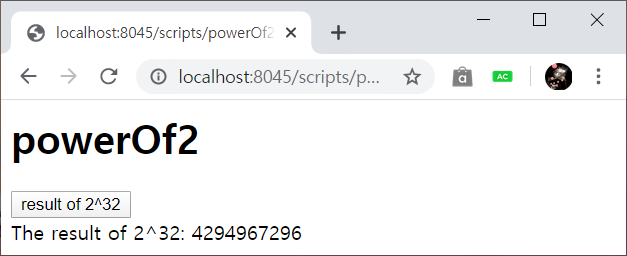

In [21]:
Image("C:/Users/minji/Desktop/powerOf2_201810808.PNG")

---